In [41]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=500,
    dir='cartpole_ssm_only',
    device=device
    )

In [42]:
ssm_trainer.train()

Episode 1: Reward = 27.0 | Validation Avg = 10.00 from 1 episodes 
Episode 2: Reward = 13.0
Episode 3: Reward = 14.0
Episode 4: Reward = 15.0 | Validation Avg = 8.00 from 1 episodes 
Episode 5: Reward = 13.0
Episode 6: Reward = 12.0
Episode 7: Reward = 15.0 | Validation Avg = 9.00 from 1 episodes 
Episode 8: Reward = 20.0 | Validation Avg = 10.00 from 1 episodes 
Episode 9: Reward = 11.0
Episode 10: Reward = 14.0
Episode 11: Reward = 12.0
Episode 12: Reward = 10.0
Episode 13: Reward = 10.0
Episode 14: Reward = 21.0 | Validation Avg = 10.00 from 1 episodes 
Episode 15: Reward = 13.0
Episode 16: Reward = 14.0
Episode 17: Reward = 9.0
Episode 18: Reward = 34.0 | Validation Avg = 10.00 from 1 episodes 
Episode 19: Reward = 15.0 | Validation Avg = 10.00 from 1 episodes 
Episode 20: Reward = 21.0 | Validation Avg = 11.00 from 1 episodes 
Episode 21: Reward = 12.0
Episode 22: Reward = 14.0
Episode 23: Reward = 34.0 | Validation Avg = 10.00 from 1 episodes 
Episode 24: Reward = 14.0
Episode 25

In [43]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 500.0


In [44]:
df = ssm_trainer.compile_data()

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss,validation_episodes
0,4.657242e-07,0.000008,0.000014,0.000007,0.007450,0.000712,0.014217,0.000017,0.000002,0.000001,...,0.251246,0.024314,0.031191,0.291509,0.091589,27,27.0,10.0,-0.565087,1
1,7.009143e-07,0.000012,0.000052,0.000028,0.015177,0.002645,0.045953,0.000062,0.000003,0.000002,...,0.244342,0.023903,0.030888,0.312785,0.094310,40,13.0,13.0,0.316183,1
2,1.611533e-06,0.000028,0.000065,0.000036,0.073355,0.003359,0.033543,0.000067,0.000013,0.000008,...,0.103599,0.022610,0.012542,0.225521,0.018232,54,14.0,14.0,-0.185099,1
3,1.752039e-07,0.000003,0.000014,0.000007,0.004730,0.000772,0.011622,0.000054,0.000001,0.000001,...,0.251213,0.024763,0.032084,0.308007,0.095507,69,15.0,8.0,-1.074221,1
4,2.087353e-07,0.000004,0.000018,0.000010,0.005228,0.001002,0.014513,0.000136,0.000001,0.000001,...,0.250757,0.024910,0.032350,0.312378,0.096859,82,13.0,13.0,-1.063709,1


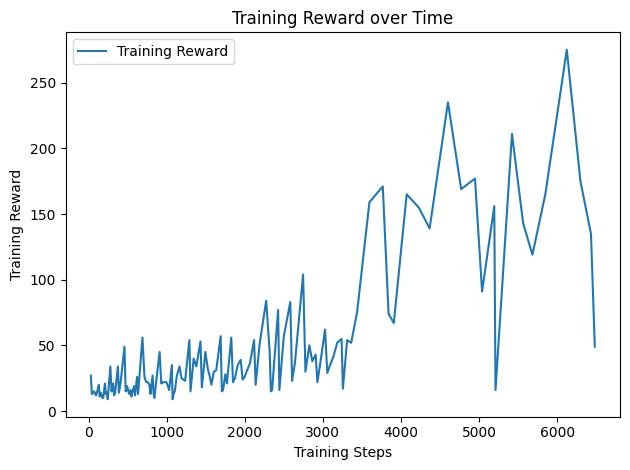

In [46]:
plt.plot(df['training_steps'], df['training_reward'], label='Training Reward', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Training Reward')
plt.title('Training Reward over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

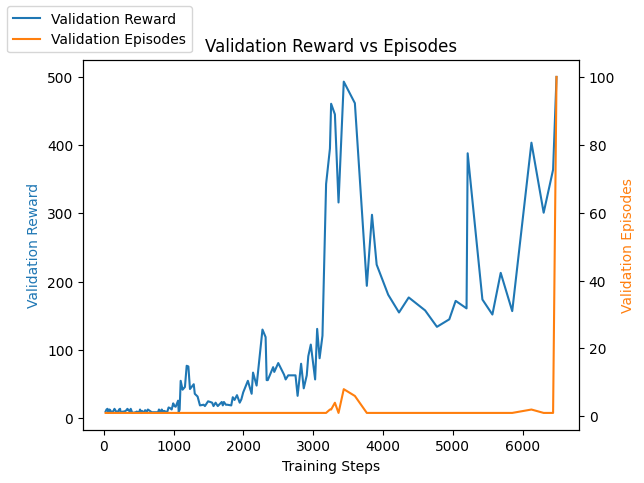

In [47]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['training_steps'], df['validation_reward'], label='Validation Reward', color='tab:blue')
ax2.plot(df['training_steps'], df['validation_episodes'], label='Validation Episodes', color='tab:orange')

ax1.set_xlabel('Training Steps')
ax1.set_ylabel('Validation Reward', color='tab:blue')
ax2.set_ylabel('Validation Episodes', color='tab:orange')

fig.legend(loc='upper left')
plt.title('Validation Reward vs Episodes')
plt.show()


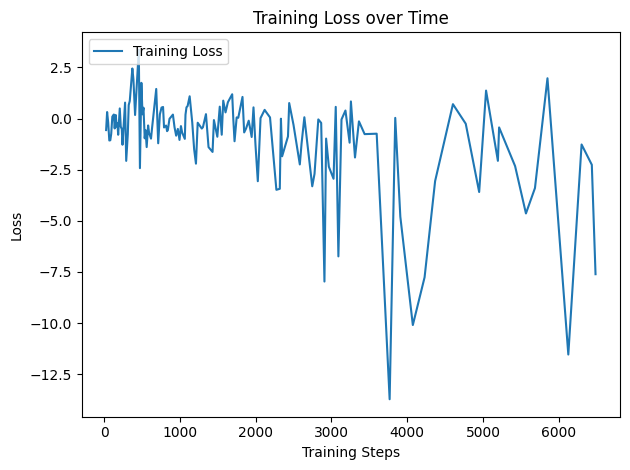

In [48]:
plt.plot(df['training_steps'], df['loss'], label='Training Loss', color='tab:blue')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

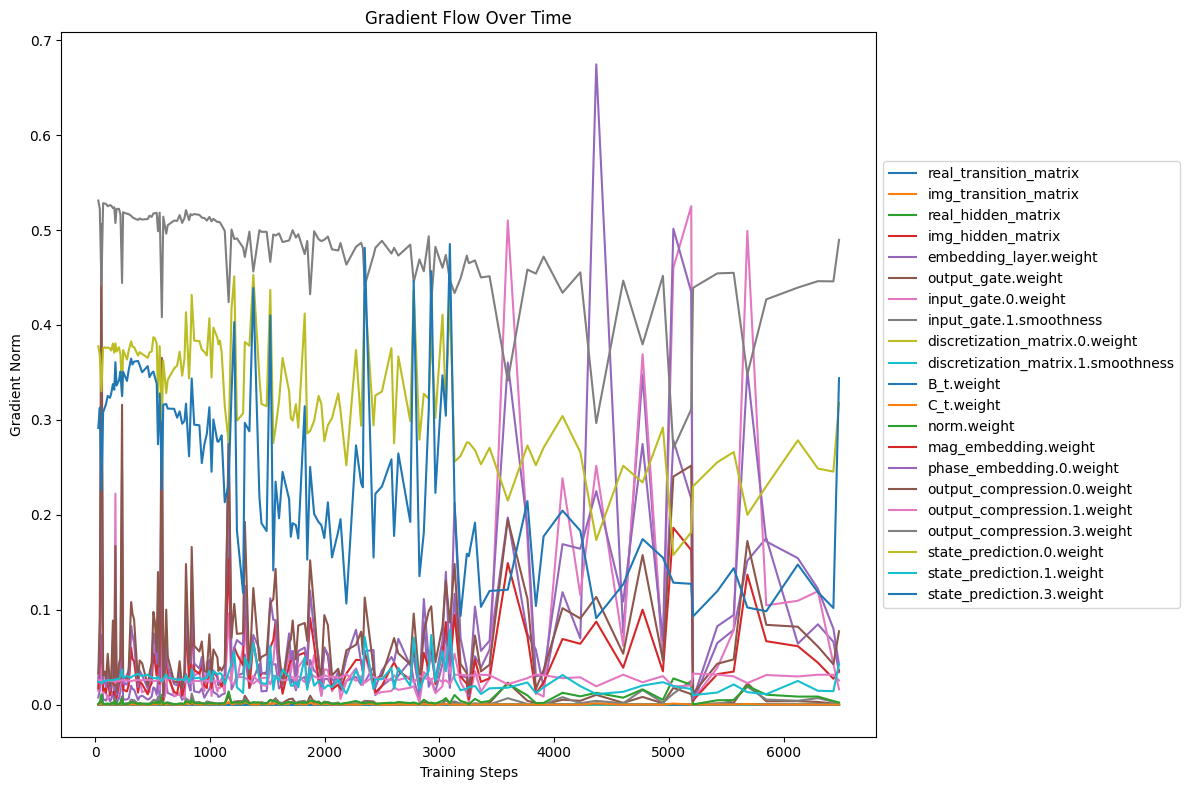

In [49]:
plt.figure(figsize=(12, 8))  # Wider plot for clarity

for gradient in ssm_trainer.gradient_data.keys():
    if 'bias' not in gradient:
        plt.plot(df['training_steps'], df[gradient], label=gradient.removeprefix('recurrent_block.'))

plt.xlabel('Training Steps')
plt.ylabel('Gradient Norm')
plt.title('Gradient Flow Over Time')

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [50]:
df['training_steps']

0        27
1        40
2        54
3        69
4        82
       ... 
135    5849
136    6124
137    6299
138    6434
139    6483
Name: training_steps, Length: 140, dtype: int64